**1. 导入图像分类数据集**

In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
import torch_directml
import matplotlib as ma
import matplotlib.pyplot as plt
dml = torch_directml.device()
import time

**1.1 下载数据集**

> `transforms.ToTensor()` : 将 PIL 图像或 NumPy 数组转换为张量（Tensor）。

 * 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
 * 并除以255使得所有像素的数值均在0～1之间

In [2]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root='./data', train=True, transform=trans, download=False)
mnist_test = torchvision.datasets.FashionMNIST(
    root='./data', train=False, transform=trans, download=False)

In [3]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [4]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [5]:
def get_fashion_mnist_labels(labels):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [6]:
# 可视化所有图片
def show_images(imgs, row, col, scales = 3, titles = None):
    fig, axes = plt.subplots(row, col, figsize=(col * scales, row * scales))
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            img = img.numpy()
        ax.imshow(img)
        ax.axis('off')
        if titles:
            ax.set_title(titles[i])
    plt.show()


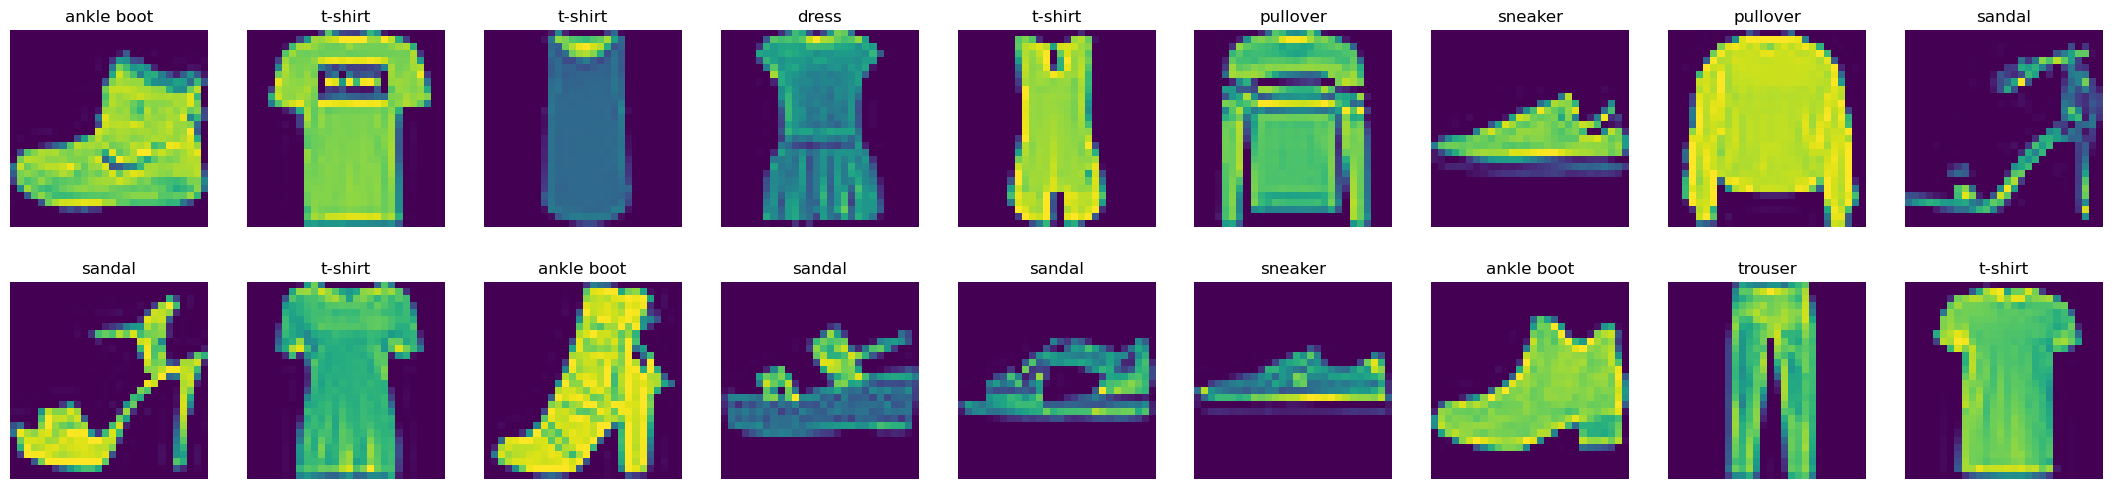

In [7]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, 3, get_fashion_mnist_labels(y));

**1.2 读取小批量**

使用 $8$ 个进程读数据

In [15]:
batch_size = 256

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=4)

In [16]:
import time
start = time.time()
for X, y in tran_iter:
    continue 
end = time.time()
print(f'time: {end - start}secs')

time: 4.565434217453003secs


**1.3 整合所有组件**

In [20]:
def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root='./data', train=True, transform=trans, download=False)
    mnist_test = torchvision.datasets.FashionMNIST(
        root='./data', train=False, transform=trans, download=False)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=4),
            data.DataLoader(mnist_test, batch_size, shuffle=False, num_workers=4))

In [21]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64
